# **INTRODUCTION**

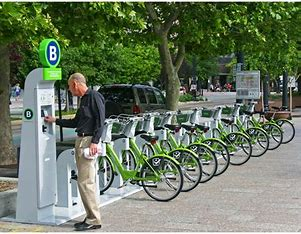

<li>Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. 
    
<br><li>Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

# **PROBLEM STATEMENT**

This dataset contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Perform Exploratory data analysis to consist of a short analysis and build a prediction model for the hourly utilization “cnt” of this data set.

In [1]:
from IPython.display import display, HTML, Javascript

# ----- Notebook Theme -----#1e77b3
color_map = ['#19e6e6', '#8cf2f2', '#a3f5f5','#baf7f7', '#d1fafa','#e8fcfc']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

### 1. Importing Necessary Libararies

In [2]:
#Import necessary libraries
#for DA and array processing
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot

#For Statistical modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Load the dataset
df = pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv')

#Read the data
df.head().style.background_gradient(cmap='Greys')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


### 2. Data Wrangling

In [3]:
#Exploring data frame,identifying Potential Errors and understanding the datatypes
pd.set_option('display.max_columns', None) 
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df.head(3))
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)
    
data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:17379
Columns:17
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1 

In [4]:
#Checking ouliers in Target varibale "cnt".

Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

In [5]:
#removing outliers
df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)]
print("shape after outliers removal :",df.shape)

shape after outliers removal : (16874, 17)


In [6]:
# converting discrete variable "season" to bins
df = pd.get_dummies(df, columns=['season'], dtype=int)
df.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
0,1,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,3,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,4,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,5,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0


### 3. Exploratory Data Analysis

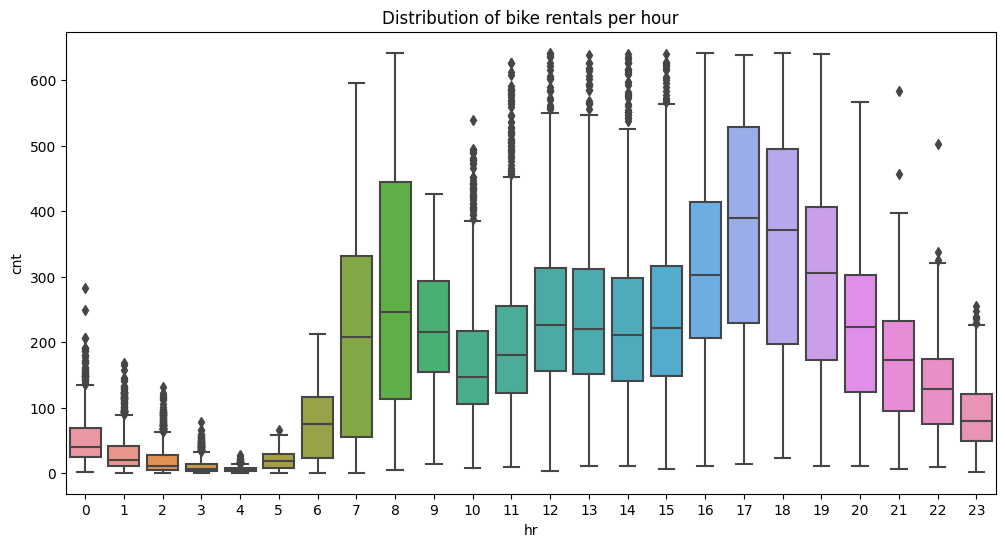

In [7]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Distribution of bike rentals per hour')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

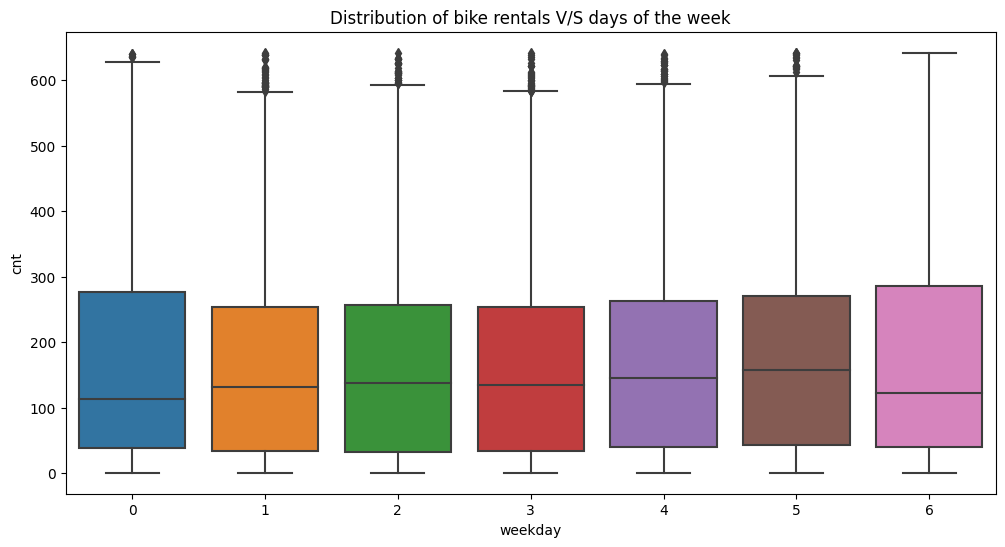

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S days of the week')



<Figure size 1200x600 with 0 Axes>

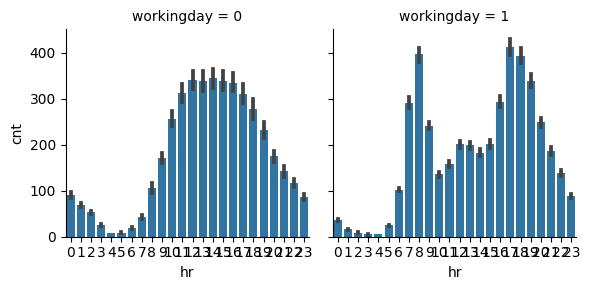

In [9]:
plt.figure(figsize=(12,6))
d = sns.FacetGrid(df, col="workingday")
d. map(sns.barplot, "hr", "cnt")

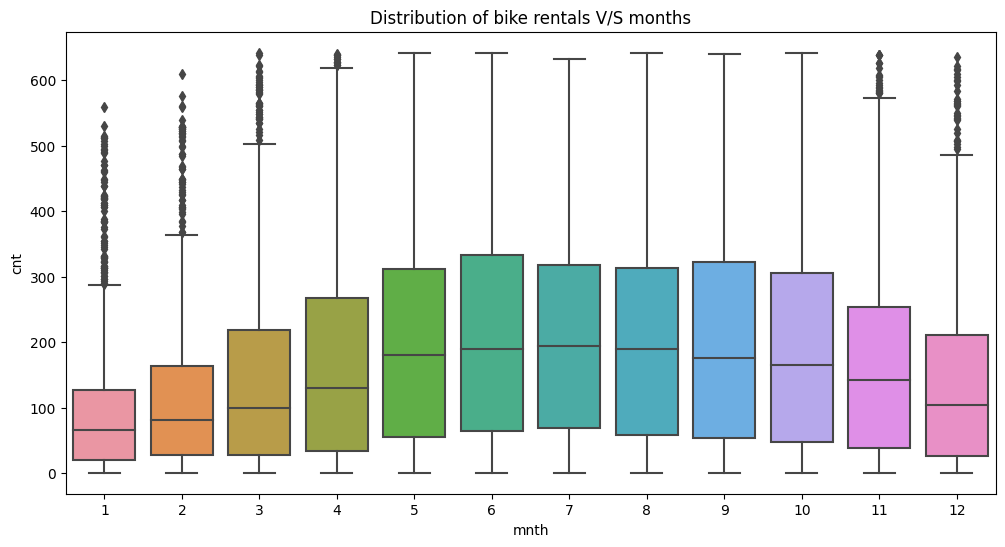

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S months')
plt.show()

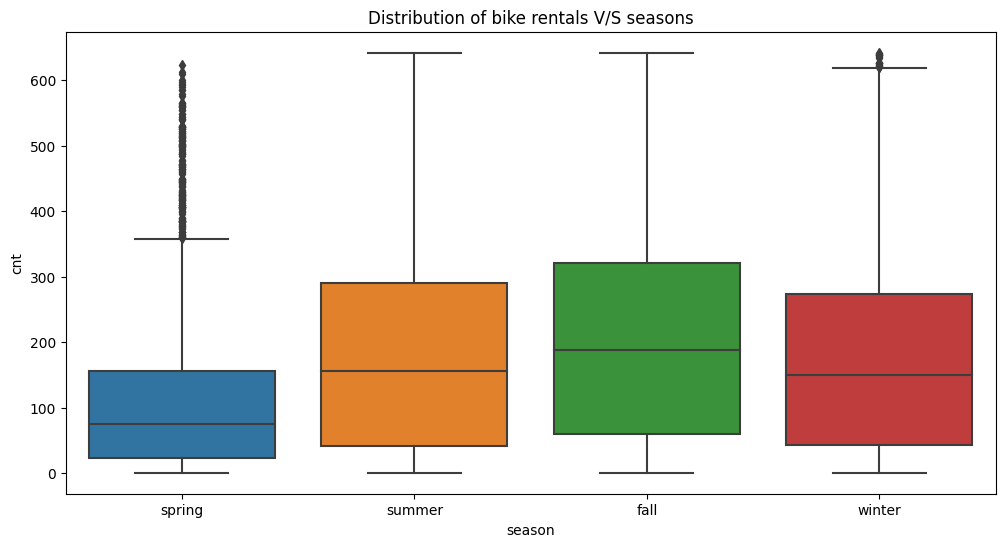

In [11]:
df['season'] = df[['season_1', 'season_2', 'season_3', 'season_4']].idxmax(axis=1)
df['season'] = df['season'].map({'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S seasons')
plt.show()


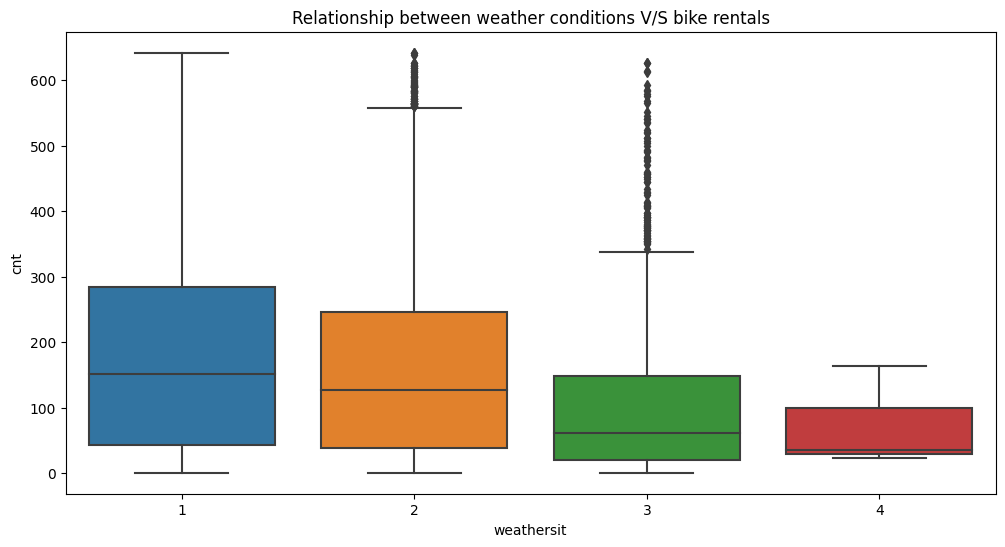

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Relationship between weather conditions V/S bike rentals')
plt.show()

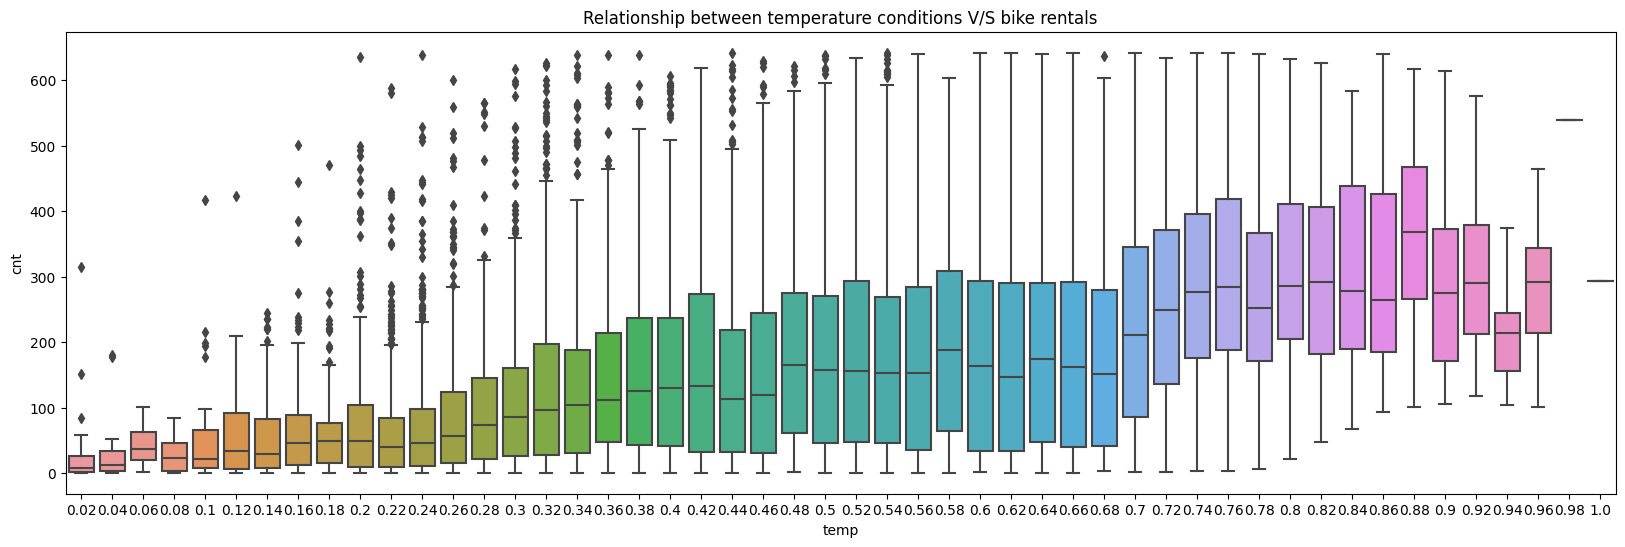

In [13]:
plt.figure(figsize=(20,6))
sns.boxplot(x='temp', y='cnt', data=df)
plt.title('Relationship between temperature conditions V/S bike rentals')
plt.show()

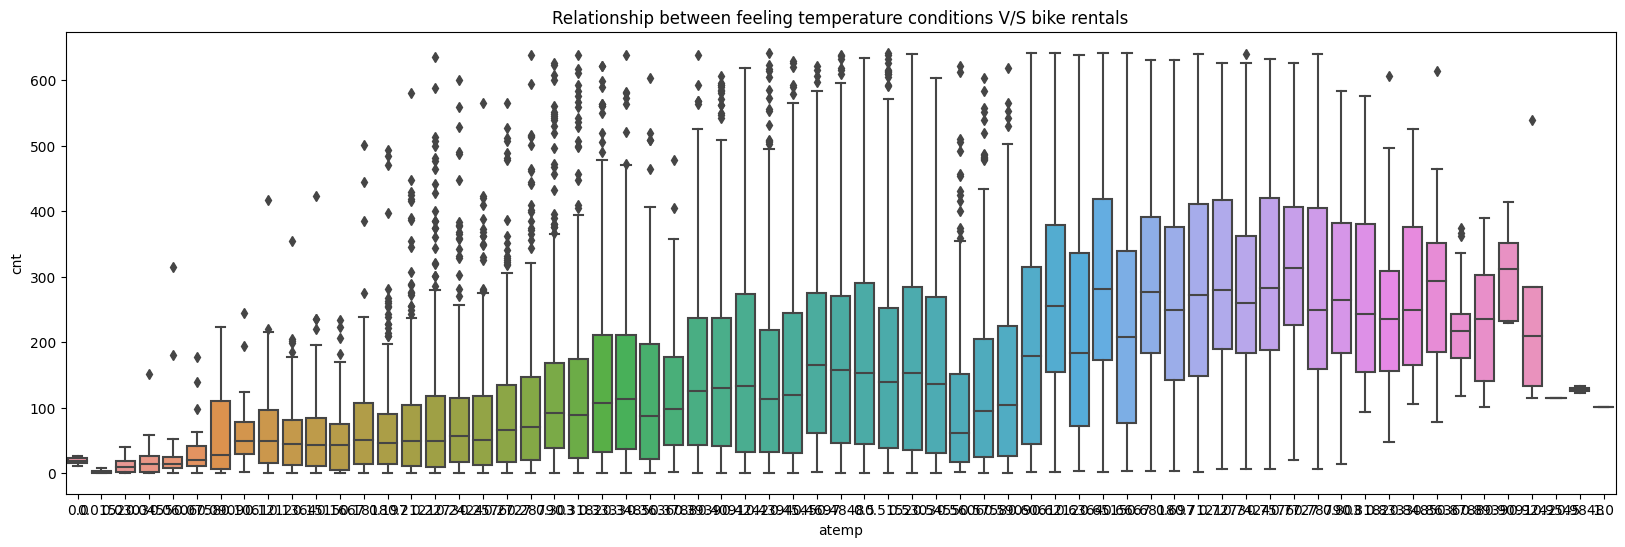

In [14]:
plt.figure(figsize=(20,6))
sns.boxplot(x='atemp', y='cnt', data=df)
plt.title('Relationship between feeling temperature conditions V/S bike rentals')
plt.show()

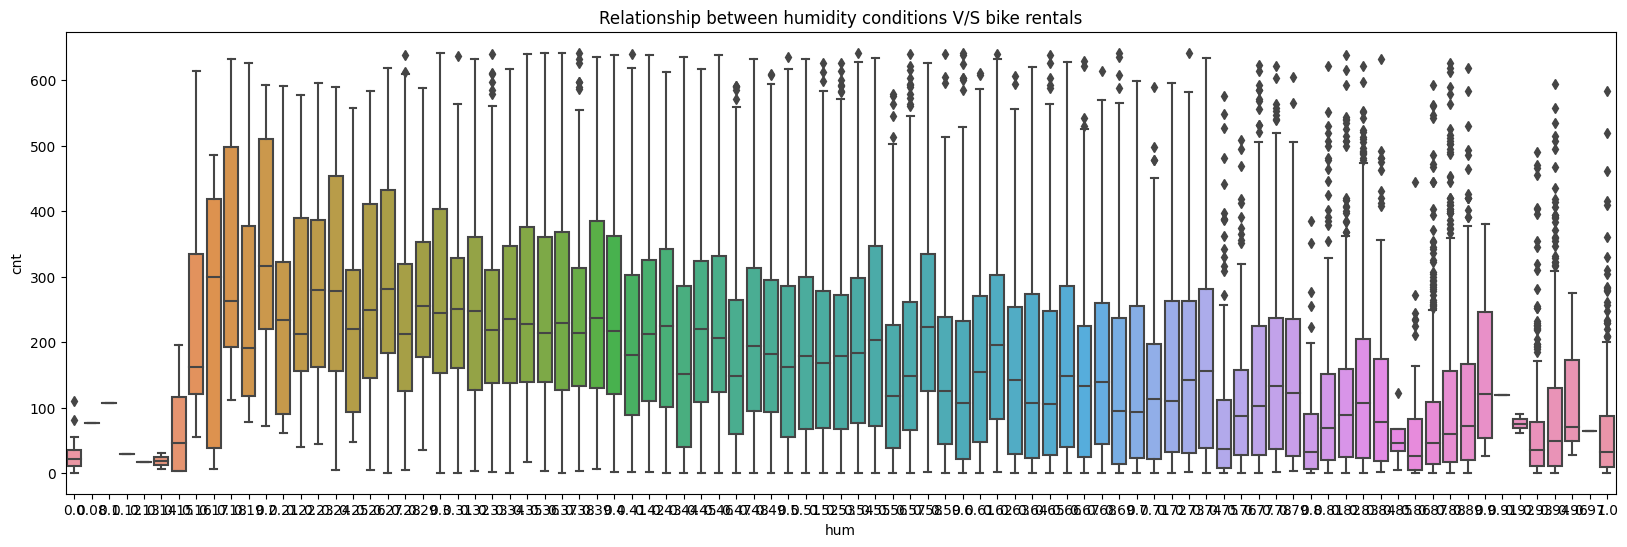

In [15]:
plt.figure(figsize=(20,6))
sns.boxplot(x='hum', y='cnt', data=df)
plt.title('Relationship between humidity conditions V/S bike rentals')
plt.show()

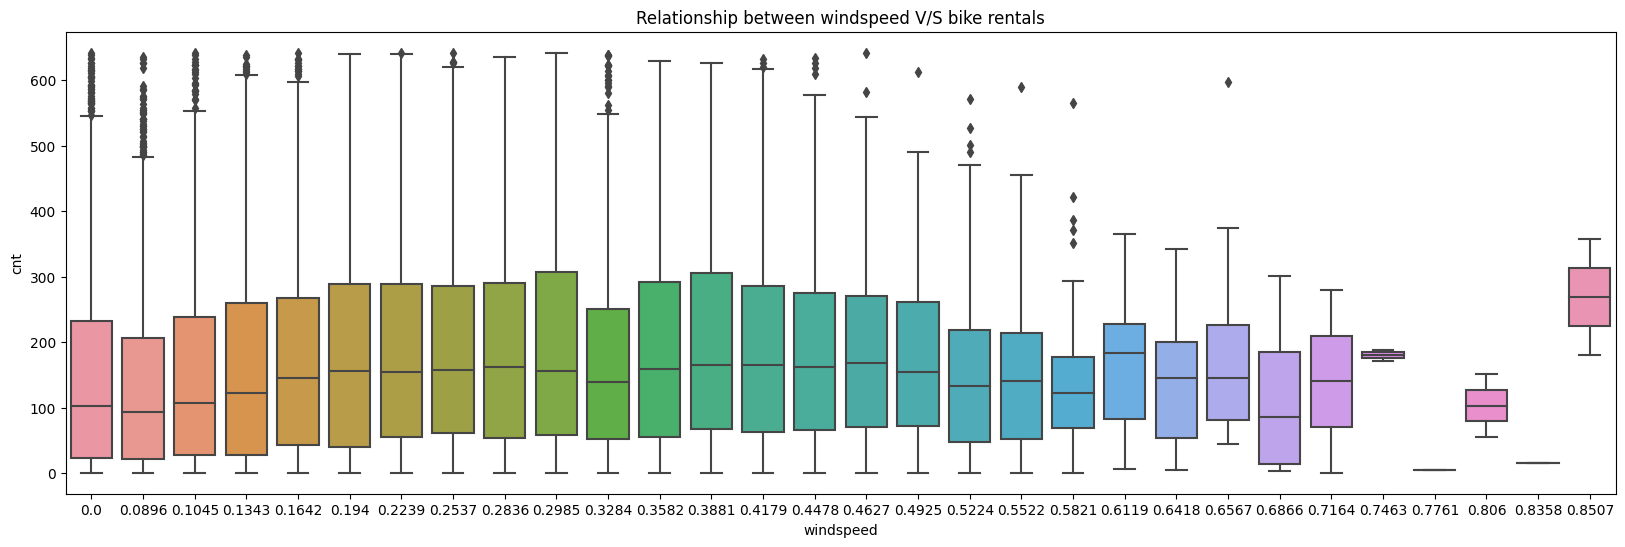

In [16]:
plt.figure(figsize=(20,6))
sns.boxplot(x='windspeed', y='cnt', data=df)
plt.title('Relationship between windspeed V/S bike rentals')
plt.show()

### Feature Engineering

In [17]:
# Define a function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

# Apply the function to the 'hr' column to create the new 'rush_hour' feature
df['rush_hour'] = df['hr'].apply(is_rush_hour)

# Display the first few rows of the dataframe to verify the changes
df.head().style.background_gradient(cmap='Greys')

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,season,rush_hour
0,1,2011-01-01,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,1,0,0,0,spring,0
1,2,2011-01-01,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,1,0,0,0,spring,0
2,3,2011-01-01,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,1,0,0,0,spring,0
3,4,2011-01-01,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13,1,0,0,0,spring,0
4,5,2011-01-01,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1,1,0,0,0,spring,0


In [18]:
#creating dimensions for Modelling
x_data = df.drop(['cnt', 'dteday', 'season'], axis=1)
y_data = df['cnt']


### Model Development

In [19]:
#Spliting test and train data with standard ratio
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (13499, 19)
shape of y_train (13499,)
shape of x_test (3375, 19)
shape of y_test (3375,)


In [20]:
#creating object, using which we could generate instances.
lm = LinearRegression() 

In [21]:
#Fitting model by supplying train data
lm.fit(x_train,y_train)

LinearRegression()

In [22]:
yhat= lm.predict(x_test)
print("Predicted cnt for test data are:", yhat[0:5].tolist())

Predicted cnt for test data are: [307.00000000000125, 219.99999999999673, 112.99999999999402, 121.00000000000291, 5.000000000006305]


### Model Evaluation

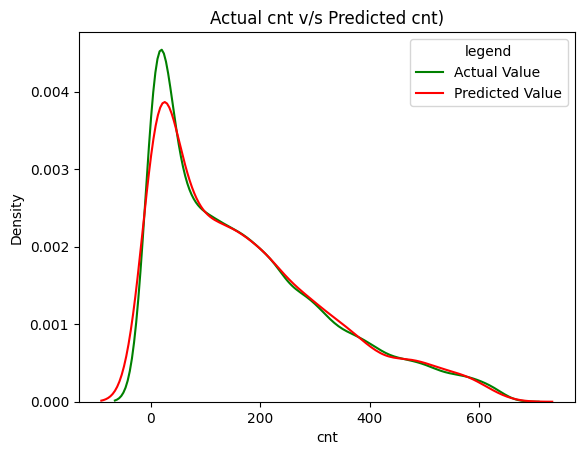

In [23]:
plt.title("Actual cnt v/s Predicted cnt)")
ax1 = sns.distplot(y_data,hist=False,color="green",label="Actual Value")
sns.distplot(yhat,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [24]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat)
print('The mean square error of cnt and predicted value is: ', mse)

The mean square error of cnt and predicted value is:  2.7933903433701475e-23


In [25]:
#R-Squared
print('the R-Squared value of fitted model is:',lm.score(x_train,y_train))

the R-Squared value of fitted model is: 1.0


# **OUTCOME**

<li> Peak Business Hours:the peak business hours, are between 7 - 9 AM and 4 - 7 PM significance of these hours for the business and potential opportunities for service enhancement can be stormed.
<li> Weekday Analysis:The observation of weekdays shows nearly equal rental counts (280). Possibility on strategies for targeting different customer segments on weekdays.
<li> Holiday Rentals:The rentals are comparatively higher on holidays. Recommended on marketing initiatives to capitalize on holiday demand.
<li> Weather Impact:
<li> Break down rental counts based on weather conditions (Weathersit):
1. Weather can influence greatly on user behavior as fallows and suggested to possible adjustments to business operations accordingly.
2. Clear, few clouds, Partly cloudy has nearly 290 rentals
3. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist has approx. 250 rentals
4. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds has lowered to 150 rentals
5. During Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 110 rentals are expected. 
6. Rental count raises with raise in Temperature
7. Rental count is inversely proportional to the humidity as expected.  Hence, business and operational strategy could be performed to optimize the overall performance.



Reasons for choosing this model.

* Regression is chosen for predictive modeling  as its possess compatibility with the dataset's characteristics, interpretability, and established performance evaluation methods. It provides a solid foundation for understanding and predicting bike rental counts.
* **Continuous Target Variable**: Regression is chosen because the target variable, "cnt" (bike rental count), is continuous, making it suitable for predicting numerical outcomes.
* **Correlation with Predictors**: The dataset includes various features like weather conditions, time of day, and season, which are likely to influence bike rental counts. Regression captures the relationships between these predictors and the target variable.
* **Interpretability**: Regression models offer interpretability, allowing us to understand how different factors affect bike rentals, making it useful for stakeholders.
* **Baseline Model**: Regression serves as a foundational baseline model for predictive tasks before exploring more complex techniques.
* **Regression Performance Metrics**: Regression models have well-established performance metrics, such as Mean Squared Error (MSE) and R-squared (R2), for effective model evaluation
